# Credit card fraud detection

In this notebook, implemented various classification algorithms to identify fraud trasactions in a highly imbalanced data. Trasanction Data is downloaded from kaggle and did not have complete details on the features, but they are already scaled and can be readly used. Model evaluation metrics for various classification techniques were performed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('C:\Users\ye543288\Documents\Personal\pythonpractice\Independent Projects\CreditF\creditcard.csv')

In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Pie chart for Genuine and Fraud transactions

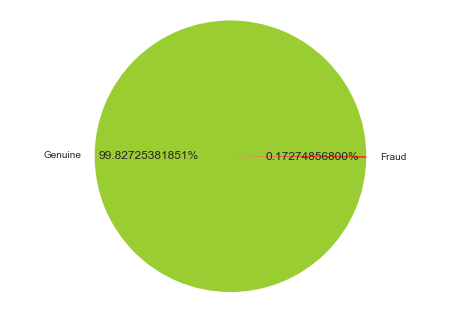

In [5]:
fig, ax = plt.subplots(1, 1)
ax.pie(data.Class.value_counts(),autopct='%1.11f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')
plt.show()

Correlation matrix to determine the coorelation between features and Class

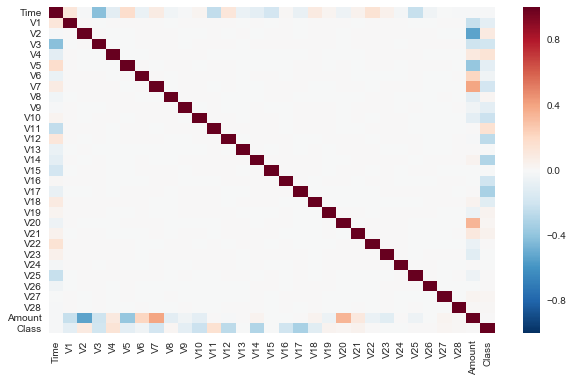

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

Based on the above correlation matrix, there shows little correlation between time and class and also between amount and class. We can plot data and apply models using time and amount and remove them if does not help with classification.

In [7]:
data['TimeInHrs'] = data["Time"]/3600
print data['TimeInHrs'].head(5)
print data['TimeInHrs'].tail(5)

0    0.000000
1    0.000000
2    0.000278
3    0.000278
4    0.000556
Name: TimeInHrs, dtype: float64
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: TimeInHrs, dtype: float64


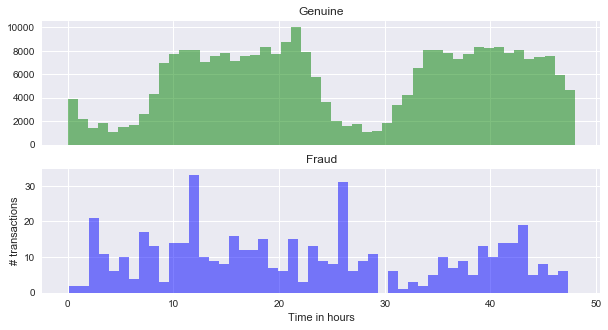

In [9]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(10,5))
ax1.hist(data.TimeInHrs[data.Class==0],bins=50,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(data.TimeInHrs[data.Class==1],bins=50,color='b',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time in hours')
plt.ylabel('# transactions')
plt.show()

From the abouve graph, there isn't any relation between genuine and fraud transcations. Both happened during every hour. So time feature might not help to distinguish between a genuine and fraud transaction. We can drop time feature.

In [10]:
data= data.drop(['Time','TimeInHrs'],axis=1)

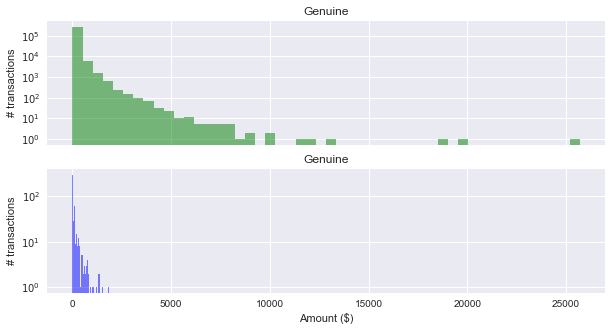

In [12]:
fig,(ax3,ax4) = plt.subplots(2,1,figsize=(10,5), sharex=True)
ax3.hist(data.Amount[data.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log')
ax3.set_title('Genuine')
ax3.set_ylabel('# transactions')
ax4.hist(data.Amount[data.Class==1],bins=50,color='b',alpha=0.5)
ax4.set_yscale('log')
ax4.set_title('Genuine')
ax4.set_ylabel('# transactions')
ax4.set_xlabel('Amount ($)')

There are no fraud transactions above 5k dollars and amount appears to a relavant feature to determine genuine and fraud transaction. Feature scaling needs to be applied on Amount using standard scalar as other features in the data set are in a different scale.

In [13]:
from sklearn.preprocessing import StandardScaler
data['Amount_std'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [14]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_std
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,3.202236e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02


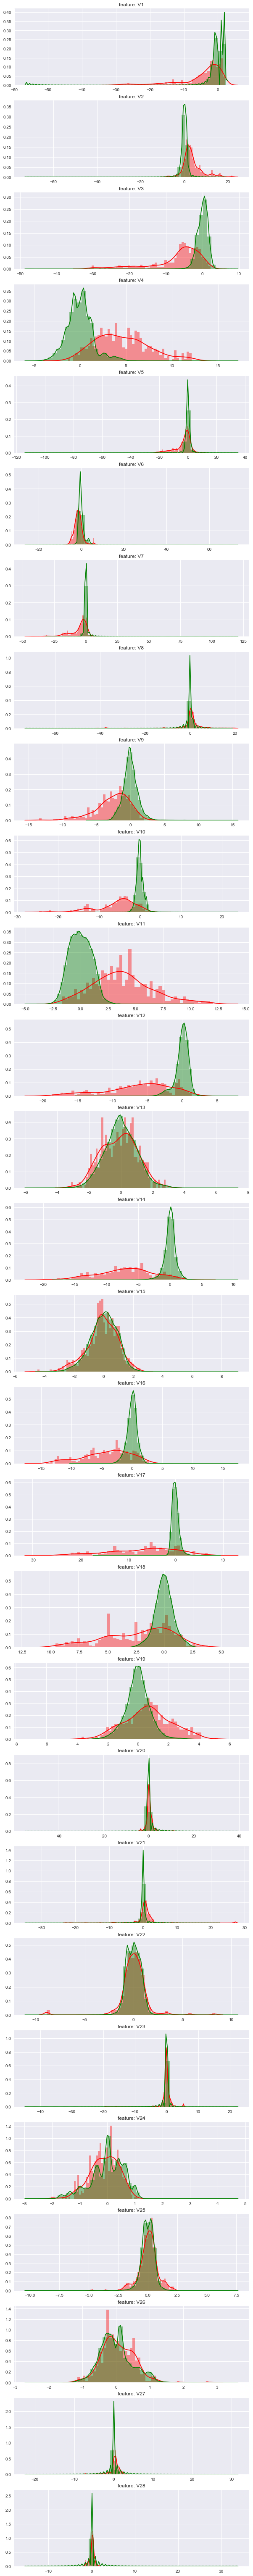

In [15]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(10,28*4))
for i,col in enumerate(data[data.iloc[:,0:28].columns]):
    ax5=plt.subplot(gs[i])
    sns.distplot(data[col][data.Class == 1], bins=50, color='r')
    sns.distplot(data[col][data.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

Plotting all V1-V28 principal components will help to determine correlations between features for genuine and fraud. Lets plot these features using sns dist plot that plots kernal density estimation plot over a histogram. From the graphs we see V8, V13, V15, V20, V22, V23, V24, V25, V26, V27, V28 and have high correlation. We need to remove these features while modelling to see if it helps in improving model performance.


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

Train and test data Split

In [19]:
from sklearn.model_selection import train_test_split
def test_train_split(df,droplist):
    df=df.drop(droplist,axis=1)
    y=df['Class'].values
    X=df.drop(['Class'],axis=1).values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
    print "train-set size: ", len(y_train),"\ntest-set size: ", len(y_test)
    print "fraud cases in test-set: ", sum(y_test)
    return X_train, X_test, y_train, y_test
    

Calculating predictions on train and test data

In [23]:
def predictions(classifier, X_train,y_train,X_test):
    clf=classifier
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    y_pred_prob=clf.predict_proba(X_test)
    train_pred=clf.predict(X_train)
    print 'train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)
    return clf,y_pred, y_pred_prob

Calculating scores for evaluating classification model and plotting ROC curve and confusion matrix

In [24]:
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
def scores(y_test,y_pred, y_pred_prob):
    print 'test-set confusion matrix:\n', confusion_matrix(y_test,y_pred) 
    print "recall score: ", recall_score(y_test,y_pred)
    print "precision score: ", precision_score(y_test,y_pred)
    print "f1 score: ", f1_score(y_test,y_pred)
    print "accuracy score: ", accuracy_score(y_test,y_pred)
    print "ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1]))
    plt.figure(figsize=(20,4))
    plt.subplot(131)
    conf_mat = metrics.confusion_matrix(y_test,y_pred)
    ax = sns.heatmap(conf_mat, annot=True)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix')
    
    #probabilities = model.decision_function(test_X)
    fp_rate, tp_rate, _ = metrics.roc_curve(y_test, y_pred_prob[:,1])
    auc = metrics.auc(fp_rate, tp_rate)
    plt.subplot(132)
    plt.plot(fp_rate, tp_rate, label='AUC: %.3f' % auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('FP rate')
    plt.ylabel('TP rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')

K-fold cross validation is performed and Cross Validated Area under curve is also calculated for all models

train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
[[194745   4275]
 [    55    289]]
test-set confusion matrix:
[[83438  1857]
 [   29   119]]
recall score:  0.804054054054
precision score:  0.0602226720648
f1 score:  0.112052730697
accuracy score:  0.977926805005
ROC AUC: 0.95543293308
Cross Validated AUC 0.963180316745
Scores with PCA
train-set confusion matrix:
[[195865   3155]
 [    52    292]]
test-set confusion matrix:
[[83940  1355]
 [   28   120]]
recall score:  0.810810810811
precision score:  0.0813559322034
f1 score:  0.147874306839
accuracy score:  0.983813770584
ROC AUC: 0.95471915435
Cross Validated AUC 0.966360969169


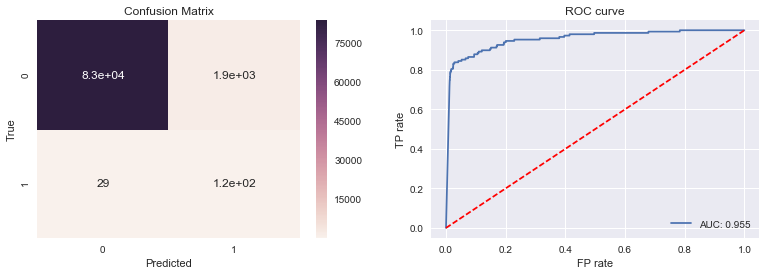

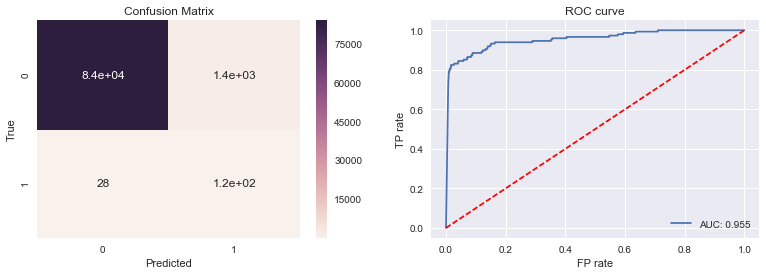

In [25]:
#Naive Bayes 
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
drop_list=[]
X_train, X_test, y_train, y_test = test_train_split(data, drop_list)
clf,y_pred, y_pred_prob = predictions(GaussianNB(), X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print "Cross Validated AUC",cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean()

clf_pca=Pipeline([('pca',PCA(n_components=20)),
                  ('gua',(GaussianNB()))])
print "Scores with PCA"
clf_pca,y_pred, y_pred_prob = predictions(clf_pca, X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print "Cross Validated AUC",cross_val_score(clf_pca, X_train, y_train, cv=10, scoring='roc_auc').mean()
    


train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
[[196031   2989]
 [    47    297]]
test-set confusion matrix:
[[84000  1295]
 [   26   122]]
recall score:  0.824324324324
precision score:  0.0860973888497
f1 score:  0.155910543131
accuracy score:  0.984539400536
ROC AUC: 0.956281934083
('Cross Validated AUC', 0.9671119620594697)
Scores with PCA
train-set confusion matrix:
[[196017   3003]
 [    97    247]]
test-set confusion matrix:
[[83985  1310]
 [   45   103]]
recall score:  0.695945945946
precision score:  0.0728945506016
f1 score:  0.13196668802
accuracy score:  0.984141474433
ROC AUC: 0.944931382816
Cross Validated AUC 0.957352730058


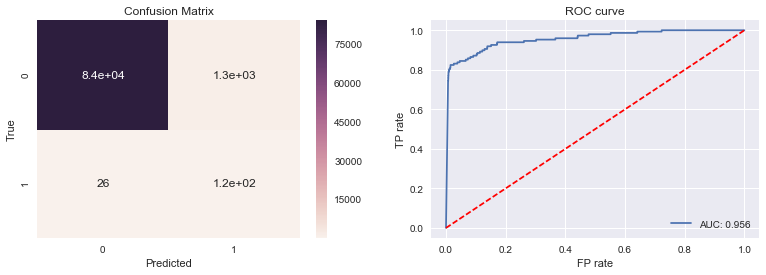

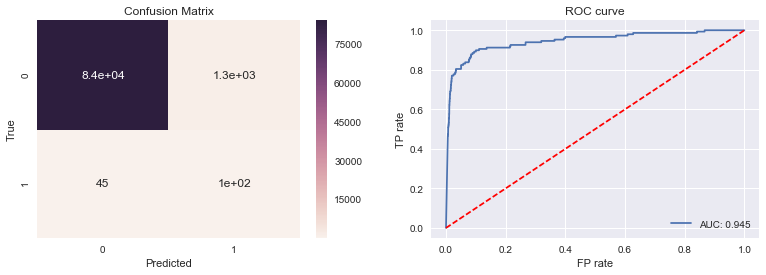

In [26]:
#Naive Bayes by  dropping few features 
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = test_train_split(data, drop_list)
clf,y_pred, y_pred_prob = predictions(GaussianNB(), X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print("Cross Validated AUC",cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean() )
clf_pca=Pipeline([('pca',PCA(n_components=10)),
                  ('gua',(GaussianNB()))])
print "Scores with PCA"
clf_pca,y_pred, y_pred_prob = predictions(clf_pca, X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print "Cross Validated AUC",cross_val_score(clf_pca, X_train, y_train, cv=10, scoring='roc_auc').mean()

train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
[[196060   2960]
 [    47    297]]
test-set confusion matrix:
[[84012  1283]
 [   26   122]]
recall score:  0.824324324324
precision score:  0.0868327402135
f1 score:  0.157115260786
accuracy score:  0.984679845043
ROC AUC: 0.955590415141
('Cross Validated AUC', 0.96724654800117205)
Scores with PCA
train-set confusion matrix:
[[196505   2515]
 [    48    296]]
test-set confusion matrix:
[[84204  1091]
 [   26   122]]
recall score:  0.824324324324
precision score:  0.100577081616
f1 score:  0.17927994122
accuracy score:  0.986926957153
ROC AUC: 0.952893614055
Cross Validated AUC 0.964678208938


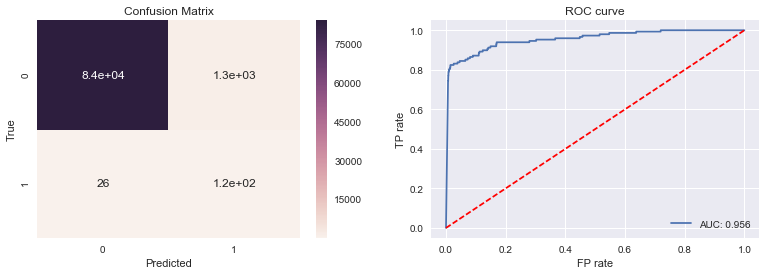

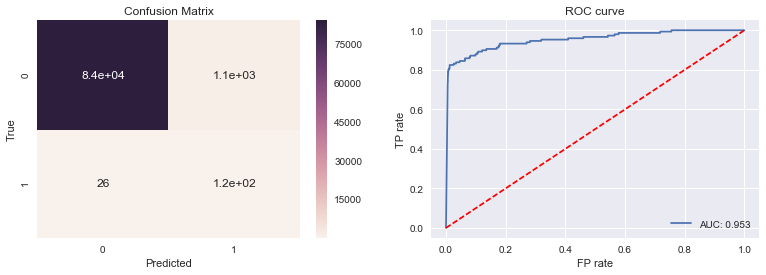

In [27]:
#Naive Bayes by  dropping few features and including amount feature
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','Amount_std']
X_train, X_test, y_train, y_test = test_train_split(data, drop_list)
clf,y_pred, y_pred_prob = predictions(GaussianNB(), X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print("Cross Validated AUC",cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean() )
clf_pca=Pipeline([('pca',PCA(n_components=15)),
                  ('gua',(GaussianNB()))])
print "Scores with PCA"
clf_pca,y_pred, y_pred_prob = predictions(clf_pca, X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print "Cross Validated AUC",cross_val_score(clf_pca, X_train, y_train, cv=10, scoring='roc_auc').mean()

train-set confusion matrix:
[[198993     27]
 [   146    198]]
test-set confusion matrix:
[[85280    15]
 [   68    80]]
recall score:  0.540540540541
precision score:  0.842105263158
f1 score:  0.658436213992
accuracy score:  0.999028592161
ROC AUC: 0.960067048701
('Cross Validated AUC', 0.9789359542430176)
Scores with PCA
train-set confusion matrix:
[[198992     28]
 [   169    175]]
test-set confusion matrix:
[[85280    15]
 [   82    66]]
recall score:  0.445945945946
precision score:  0.814814814815
f1 score:  0.576419213974
accuracy score:  0.998864740236
ROC AUC: 0.944554827998
Cross Validated AUC 0.973608522094


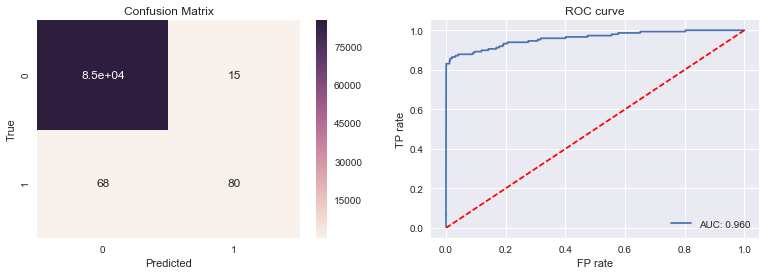

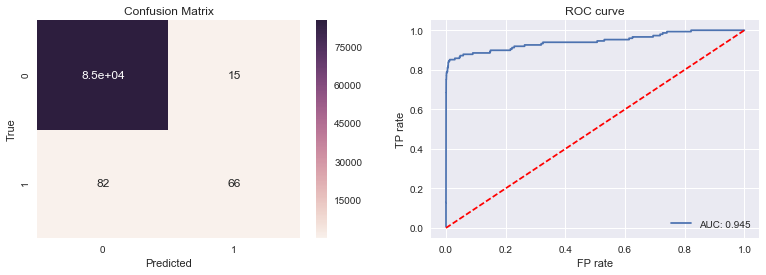

In [28]:
#Logistic regression
clf,y_pred, y_pred_prob = predictions(LogisticRegression(C = 0.01, penalty = 'l1')
                                      , X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print("Cross Validated AUC",cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean() )
clf_pca=Pipeline([('pca',PCA(n_components=10)),
                  ('lr',(LogisticRegression(C = 0.01, penalty = 'l1')))])
print "Scores with PCA"
clf_pca,y_pred, y_pred_prob = predictions(clf_pca, X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print "Cross Validated AUC",cross_val_score(clf_pca, X_train, y_train, cv=10, scoring='roc_auc').mean()

train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
[[198993     27]
 [   146    198]]
test-set confusion matrix:
[[85280    15]
 [   68    80]]
recall score:  0.540540540541
precision score:  0.842105263158
f1 score:  0.658436213992
accuracy score:  0.999028592161
ROC AUC: 0.960067207133
('Cross Validated AUC', 0.97893595424301783)
Scores with PCA
train-set confusion matrix:
[[198992     28]
 [   169    175]]
test-set confusion matrix:
[[85280    15]
 [   82    66]]
recall score:  0.445945945946
precision score:  0.814814814815
f1 score:  0.576419213974
accuracy score:  0.998864740236
ROC AUC: 0.944554827998
Cross Validated AUC 0.973608522094


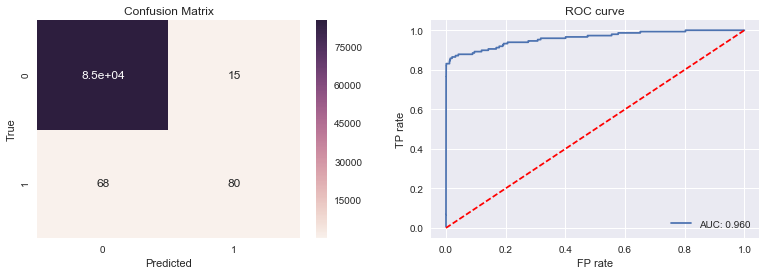

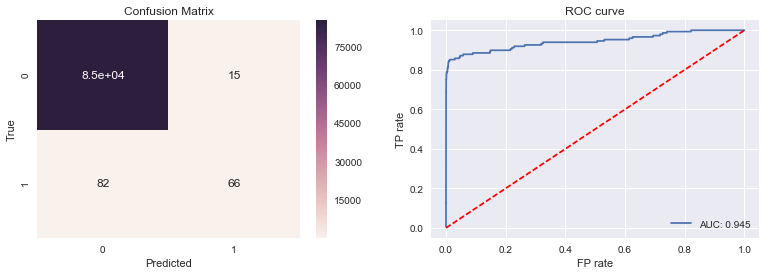

In [29]:
#Logistic regression with amount 
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','Amount_std']
X_train, X_test, y_train, y_test = test_train_split(data, drop_list)
clf,y_pred, y_pred_prob = predictions(LogisticRegression(C = 0.01, penalty = 'l1')
                                      , X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print("Cross Validated AUC",cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean() )
clf_pca=Pipeline([('pca',PCA(n_components=10)),
                  ('lr',(LogisticRegression(C = 0.01, penalty = 'l1')))])
print "Scores with PCA"
clf_pca,y_pred, y_pred_prob = predictions(clf_pca, X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print "Cross Validated AUC",cross_val_score(clf_pca, X_train, y_train, cv=10, scoring='roc_auc').mean()

train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
[[199020      0]
 [     0    344]]
test-set confusion matrix:
[[85267    28]
 [   41   107]]
recall score:  0.722972972973
precision score:  0.792592592593
f1 score:  0.756183745583
accuracy score:  0.999192444086
ROC AUC: 0.861322350253
('Cross Validated AUC', 0.87769315021757888)
Scores with PCA
train-set confusion matrix:
[[199020      0]
 [     0    344]]
test-set confusion matrix:
[[85261    34]
 [   46   102]]
recall score:  0.689189189189
precision score:  0.75
f1 score:  0.718309859155
accuracy score:  0.999063703288
ROC AUC: 0.844395286312
Cross Validated AUC 0.853058047458


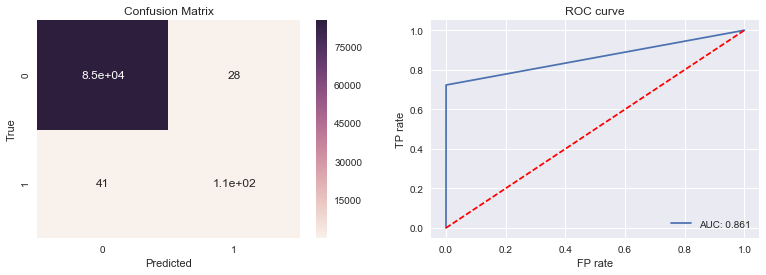

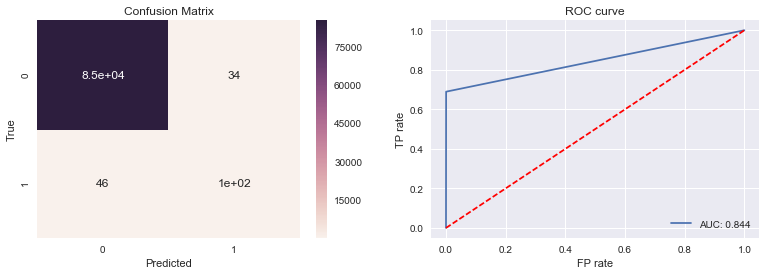

In [30]:
#Decision tree
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','Amount_std']
X_train, X_test, y_train, y_test = test_train_split(data, drop_list)
clf,y_pred, y_pred_prob = predictions(DecisionTreeClassifier()
                                      , X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print("Cross Validated AUC",cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean() )
clf_pca=Pipeline([('pca',PCA(n_components=10)),
                  ('DT',(DecisionTreeClassifier()))])
print "Scores with PCA"
clf_pca,y_pred, y_pred_prob = predictions(clf_pca, X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print "Cross Validated AUC",cross_val_score(clf_pca, X_train, y_train, cv=10, scoring='roc_auc').mean()

train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
[[199019      1]
 [    52    292]]
test-set confusion matrix:
[[85289     6]
 [   39   109]]
recall score:  0.736486486486
precision score:  0.947826086957
f1 score:  0.828897338403
accuracy score:  0.999473333099
ROC AUC: 0.963823526616
('Cross Validated AUC', 0.97190392587544516)
Scores with PCA
train-set confusion matrix:
[[199019      1]
 [    53    291]]
test-set confusion matrix:
[[85291     4]
 [   31   117]]
recall score:  0.790540540541
precision score:  0.96694214876
f1 score:  0.869888475836
accuracy score:  0.999590370188
ROC AUC: 0.966907972807
Cross Validated AUC 0.974088291029


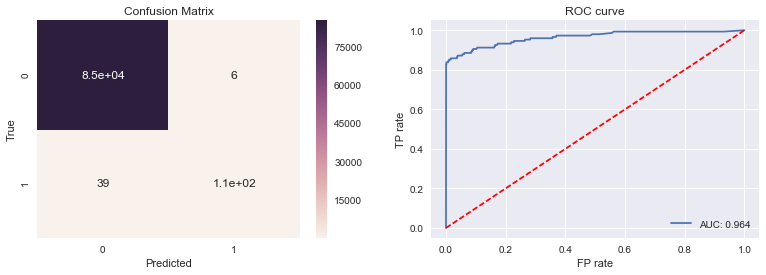

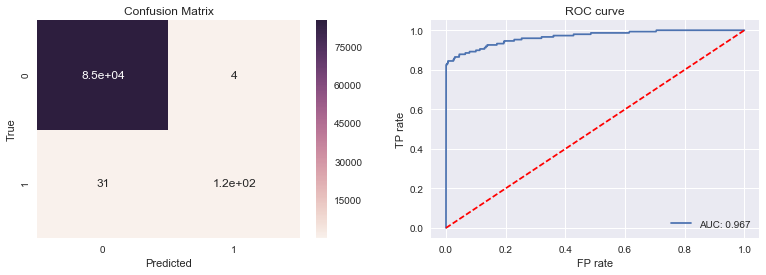

In [31]:
#Random forest
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','Amount_std']
X_train, X_test, y_train, y_test = test_train_split(data, drop_list)
clf,y_pred, y_pred_prob = predictions(RandomForestClassifier(n_estimators=30, oob_score=True, max_depth=10, random_state=0)
                                      , X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print("Cross Validated AUC",cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean() )
clf_pca=Pipeline([('pca',PCA(n_components=16)),
                  ('RFC',RandomForestClassifier(n_estimators=30, oob_score=True, max_depth=10, random_state=0))])
print "Scores with PCA"
clf_pca,y_pred, y_pred_prob = predictions(clf_pca, X_train, y_train, X_test)
scores(y_test,y_pred,y_pred_prob)
print "Cross Validated AUC",cross_val_score(clf_pca, X_train, y_train, cv=10, scoring='roc_auc').mean()

Various metrics were calculated to measure performance of each model. Accuracy is good metric to evaluate a machine learning model but in this case we cant use it as a dumb model that precits all transactions as genuine will also have 99% accuracy. Recall is a good mesaure in this case as genuine transactions can be flagged a fraud than fraud as genuine. Out of all the models, randomforest and Naive Bayes model with PCA has good recall, F1 score and cross validated AUC.